In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the "../input/" directory on kaggle.
from subprocess import check_output
import re

In [34]:
cars = pd.read_csv('auto-mpg.csv')

In [35]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [36]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [37]:
type(cars['horsepower'][0])

str

In [38]:
cars.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [39]:
cars.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [40]:
cars = cars[cars['horsepower']!='?']

In [41]:
cars.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [42]:
cars.shape

(392, 9)

In [43]:
cars['horsepower'] = cars['horsepower'].astype('float')

In [44]:
cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [45]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [46]:
cars[['manufacturer', 'model']] = cars['car name'].str.split(' ', n=1, expand=True)
# cars.drop('car name', axis=1, inplace=True)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford,torino


In [47]:
errors = {
         "vokswagen" : "volkswagen", 
         "vw" : "volkswagen", 
         "toyouta" : "toyota", 
         "mercedes-benz" : "mercedes", 
         "chevroelt": "chevrolet",
         "chevy" : "chevrolet", 
         "maxda" : "mazda"
         }

cars.manufacturer = cars.manufacturer.map(errors).fillna(cars.manufacturer)

In [48]:
cars['manufacturer'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'capri', 'mercedes', 'cadillac', 'triumph', 'nissan'], dtype=object)

In [49]:
# def alphanumeric(x):
#     return re.sub('[^A-Za-z0-9]+', '', (str(x)))

# cars['model'] = cars.model.apply(lambda x: alphanumeric(x))

In [50]:
cars[cars['manufacturer'].str.contains('hi')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,manufacturer,model
28,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d,hi,1200d


In [51]:
cars['country'] = cars.origin.replace([1,2,3],['USA','Europe','Japan'])

In [52]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,manufacturer,model,country
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,chevelle malibu,USA
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick,skylark 320,USA
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth,satellite,USA
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc,rebel sst,USA
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford,torino,USA


In [53]:
cars['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [54]:
cars['weight'].min()

1613

In [55]:
len(cars['manufacturer'].unique())

30

In [24]:
cars['acceleration'].max()

24.8

In [56]:
p = cars[(cars['model'] == 'fairmontman') ]
# p = p.reset_index(drop=True)
p

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,manufacturer,model,country


In [26]:
p.iloc[0]['acceleration']

14.5

In [59]:
print(cars.shape)
print(len(cars['weight'].unique()))

(392, 12)
346


In [27]:
cars1 = cars.sort_values(['model year', 'acceleration'], ascending=[True, False])
cars23= cars1.head(5)
cars23

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,manufacturer,model,country
19,26.0,4,97.0,46.0,1835,20.5,70,2,volkswagen 1131 deluxe sedan,volkswagen,1131deluxesedan,Europe
28,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d,hi,1200d,USA
20,25.0,4,110.0,87.0,2672,17.5,70,2,peugeot 504,peugeot,504,Europe
22,25.0,4,104.0,95.0,2375,17.5,70,2,saab 99e,saab,99e,Europe
17,21.0,6,200.0,85.0,2587,16.0,70,1,ford maverick,ford,maverick,USA


In [28]:
# ca = cars.groupby(['manufacturer'])
# c = ca.get_group('chevrolet')
# c.groupby('model').first()

In [29]:
man_count = cars.groupby('manufacturer').agg(count_manufacturers=pd.NamedAgg(column='manufacturer', aggfunc='count'))
man_count = man_count.reset_index()
man_count.head()

,manufacturer,count_manufacturers
0,amc,27
1,audi,7
2,bmw,2
3,buick,17
4,cadillac,2


In [30]:
year_manufacturer = cars.groupby(['manufacturer','model year','country']).agg(mean_mpg=('mpg',np.mean))
y_m = year_manufacturer.reset_index()
y_m.head()

,manufacturer,model year,country,mean_mpg
0,amc,70,USA,17.500000
1,amc,71,USA,18.333333
2,amc,72,USA,16.000000
3,amc,73,USA,15.750000
4,amc,74,USA,16.333333


In [88]:
y_m['manufacturer'] = y_m['manufacturer'].replace('volkswagen', 'VW') 

In [91]:
y_m.to_csv('years_manufacturers.csv')

In [89]:
y_m.manufacturer.unique()

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet',
       'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda',
       'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel',
       'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
       'toyota', 'triumph', 'VW', 'volvo'], dtype=object)

In [ ]:
{'points': [{'curveNumber': 0, 'pointNumber': 0, 'pointIndex': 0, 'x': 'amc', 'y': 17.5}]}

In [95]:
bb = {'points': [{'curveNumber': 0, 'pointNumber': 0, 'pointIndex': 0, 'x': 'amc', 'y': 17.5}]}
cc = bb['points'][0]
target = cc['x']

{'curveNumber': 0, 'pointNumber': 0, 'pointIndex': 0, 'x': 'amc', 'y': 17.5}

In [45]:
a = cars.groupby(['manufacturer','model year','model']).agg(mean_mpg=('mpg',np.mean)).head()

mean_mpg
manufacturer model year model                  
amc          70         ambassadordpl      15.0
                        gremlin            21.0
                        hornet             18.0
                        rebelsst           16.0
             71         gremlin            19.0

In [96]:
cars.to_csv('cars_processed.csv',index=False)

<h2>End</h2>

In [20]:
cars.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [21]:
# sns.distplot(cars['mpg'])

In [22]:
print("Skewness: %f" % cars['mpg'].skew())
print("Kurtosis: %f" % cars['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [23]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [24]:
data_scale = cars.copy()

In [25]:
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [26]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,manufacturer,model
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet,chevellemalibu
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,buick,skylark320
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,plymouth,satellite
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,amc,rebelsst
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,ford,torino


In [27]:
# data_scale = data_scale.reset_index()

In [29]:
# data_scale.groupby('origin')['car name'].count()

In [30]:
cars['country'] = cars.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['country'] = data_scale.origin.replace([1,2,3],['USA','Europe','Japan'])

In [31]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,manufacturer,model,country
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet,chevellemalibu,USA
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,buick,skylark320,USA
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,plymouth,satellite,USA
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,amc,rebelsst,USA
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,ford,torino,USA


In [26]:
# var = 'Country_code'
# data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="mpg", data=data_plt)
# fig.axis(ymin=0, ymax=1)
# plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [27]:
# var = 'model year'
# data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="mpg", data=data_plt)
# fig.axis(ymin=0, ymax=1)
# plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [28]:
# var = 'cylinders'
# data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="mpg", data=data_plt)
# fig.axis(ymin=0, ymax=1)
# plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [29]:
# corrmat = cars.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, square=True);

In [30]:
# factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
# corrmat = cars[factors].corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, square=True);

In [31]:
# sns.set()
# sns.pairplot(cars, size = 2.0,hue ='Country_code')
# plt.show()

In [33]:
cars[cars.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country
car name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA


In [36]:
cars['company_Name'] = cars.index.str.extract('(^.*?)\s')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country,company_Name
car name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA,NaN
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA,NaN
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA,NaN
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA,NaN
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA,NaN


In [41]:
cars['company_Name'] = cars['company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
cars['company_Name']=='VW'

car name
chevrolet chevelle malibu     True
buick skylark 320             True
plymouth satellite            True
amc rebel sst                 True
ford torino                   True
                             ...  
ford mustang gl              False
vw pickup                    False
dodge rampage                False
ford ranger                  False
chevy s-10                   False
Name: cylinders, Length: 392, dtype: bool

In [44]:
cars['company_Name'] = cars['company_Name'].replace('maxda','mazda')
cars['company_Name'] = cars['company_Name'].replace('toyouta','toyota')
cars['company_Name'] = cars['company_Name'].replace('mercedes','mercedes-benz')
cars['company_Name'] = cars['company_Name'].replace('nissan','datsun')
cars['company_Name'] = cars['company_Name'].replace('capri','ford')
cars['company_Name'] = cars['company_Name'].replace(['chevroelt','chevy'],'chevrolet')

In [45]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,country,company_Name
car name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,USA,subaru
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,USA,subaru
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,USA,subaru
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,USA,subaru
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,USA,subaru
ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,USA,subaru
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,subaru
plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,USA,subaru
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru


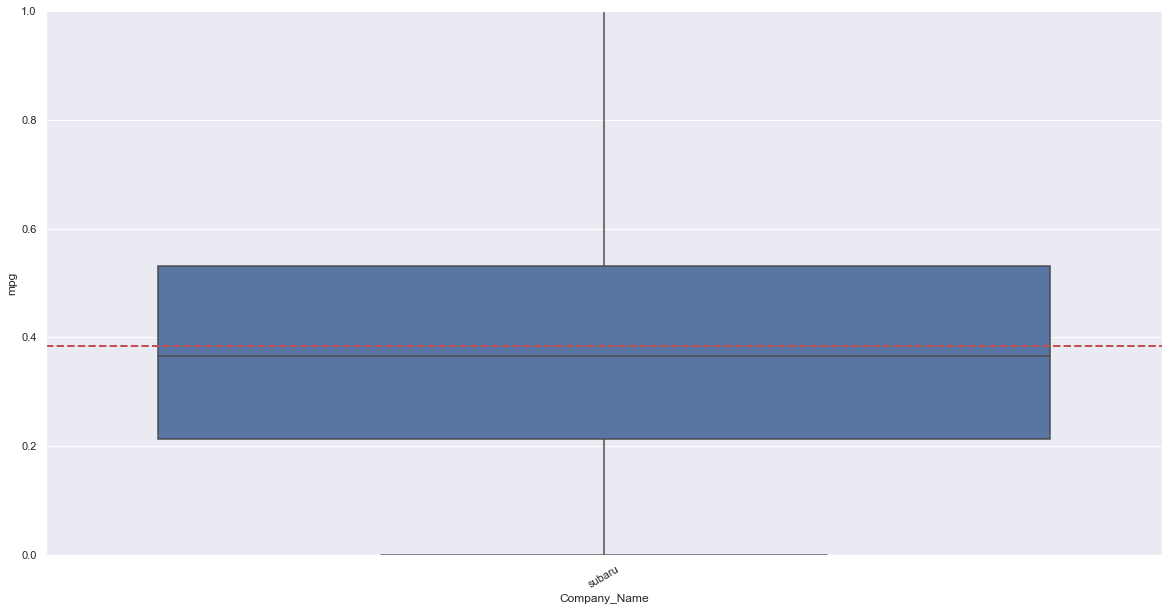

In [105]:
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], cars[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [118]:
var='mpg'
cars[cars[var]== cars[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Company_Name
car name,,,,,,,,,
hi 1200d,9.0,8,304.0,193,4732,18.5,70,1,subaru


In [120]:
cars[cars[var]== cars[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Company_Name
car name,,,,,,,,,
mazda glc,46.6,4,86.0,65,2110,17.9,80,3,subaru
